In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances

traditional = np.load("bin/realizations.npy").reshape((100, -1))
proposed = np.load("gan_bin/realizations.npy").reshape((100, -1))

In [2]:
dist_euclid = euclidean_distances(proposed)
mds = MDS(metric=True, dissimilarity='precomputed', random_state=0)

# Get the embeddings
gan = mds.fit_transform(dist_euclid)

dist_euclid_or = euclidean_distances(traditional)
# Get the embeddings
original = mds.fit_transform(dist_euclid_or)

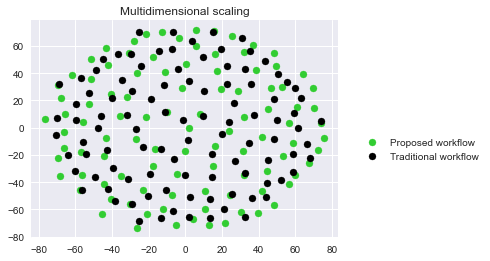

In [3]:
plt.style.use("seaborn")
fig, ax = plt.subplots(1, 1, figsize=(5.5, 4))
plt.scatter(x=gan[:, 0], y=gan[:, 1], color="limegreen")
plt.scatter(x=original[:, 0], y=original[:, 1], color="black")
plt.title("Multidimensional scaling")
plt.legend(["Proposed workflow", "Traditional workflow"],
           bbox_to_anchor = (1.05, 0.5))
plt.savefig("mds.png", dpi=500, bbox_inches='tight')